<a href="https://colab.research.google.com/github/juliahansen3/Machine-Learning-Projects/blob/main/Color_Blindness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#test 
import os
path='drive/My Drive/Colorblind Tests'
files=os.listdir(os.path.join(os.getcwd(),path))
files

['Negative CBT', 'Positive CBT']

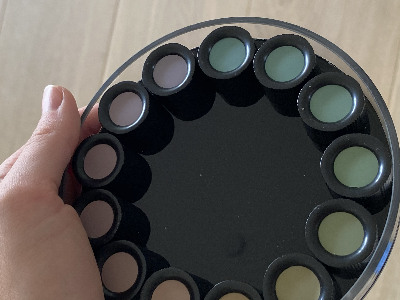

In [ ]:
path2='drive/My Drive/Colorblind Tests/Negative CBT/Test1.jpeg'
from keras_preprocessing import image
image_=image.load_img(path2,target_size=(300,400))
first=plt.imread(path2)
image_

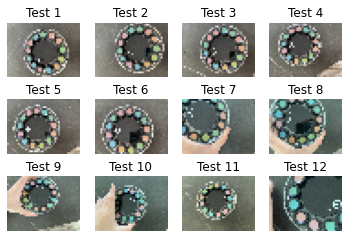

In [ ]:
n=20
paths_p=[]
for i in range(n):
  path="drive/My Drive/Colorblind Tests/Positive CBT/Test{}.jpeg".format(i+1)
  paths_p.append(path)
  images=image.load_img(path, target_size=(30,40))
  if ((i+1)<=12):
    plt.subplot(3,4,i+1)
    plt.imshow(images)
    plt.title("Test {}".format(i+1))
    plt.axis("off")
images_p=[]
results=[]
for j in paths_p:
  images=image.load_img(j,target_size=(30,40))
  images_p.append(images)
  result="Positive"
  results.append(result)
arrays_p=[]
for k in images_p:
  p=image.img_to_array(k)
  p_=p.flatten()
  arrays_p.append(p_)

In [ ]:
positives=pd.DataFrame(data=images_p)
results_data=pd.DataFrame(data=results)
chart1=pd.concat([positives,results_data], axis=1)

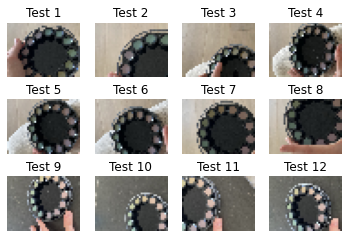

In [ ]:
n=20
paths_n=[]
for i in range(n):
  path="drive/My Drive/Colorblind Tests/Negative CBT/Test{}.jpeg".format(i+1)
  paths_n.append(path)
  images=image.load_img(path, target_size=(30,40))
  if((i+1)<=12):
    plt.subplot(3,4,i+1)
    plt.imshow(images)
    plt.title("Test {}".format(i+1))
    plt.axis('off')
images_n=[]
results2=[]
for j in paths_n:
  images=image.load_img(j,target_size=(30,40))
  images_n.append(images)
  result="Negative"
  results2.append(result)
arrays_n=[]
for k in images_n:
  n=image.img_to_array(k)
  n_=n.flatten()
  arrays_n.append(n_)

In [ ]:
negatives=pd.DataFrame(data=images_n)
results2_data=pd.DataFrame(data=results2)
chart2=pd.concat([negatives,results2_data], axis=1)

In [ ]:
results_combined=np.array([results,results2])
results_f=results_combined.flatten()
results_c=pd.DataFrame(data=results_f, columns=["Result"])

In [ ]:
from sklearn import preprocessing
result_label=preprocessing.LabelEncoder()
y=results_c
y_new=y.apply(result_label.fit_transform)

In [ ]:
arrays_tot=np.array((arrays_n,arrays_p))
arrays_changed=np.transpose(arrays_tot, axes=[0,1,2]).reshape(40,-1)#make same shape as results array
x=arrays_changed 

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=0.15)

In [ ]:
from sklearn.preprocessing import StandardScaler
data_scaler=StandardScaler()
data_scaler.fit(x_train)
x_train=data_scaler.transform(x_train) #scaling x data so will lead to more accurate results
x_test=data_scaler.transform(x_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

obj_neural=MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=225000) #setting up neural network. Increasing hidden layer size leads to more accurate results 
obj_neural.fit(x_train, y_train.values.ravel()) #fitting neural network, including bias and weight vectors to training data 

predictions=obj_neural.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions)) #compares predicted classes to actual classes --> showing which objects got classified the right way according to a matrix.
print(classification_report(y_test, predictions)) #analyzes the predictions 

[[3 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [ ]:
y_u=np.array(y_test)


In [ ]:
test_data=pd.DataFrame(data={"Predicted Result": predictions})
test_data
test_data_2=pd.DataFrame(data=y_u, columns=["Actual Result"])
test_data_3=pd.concat([test_data, test_data_2], axis=1)
test_data_3.apply(result_label.inverse_transform)

,Predicted Result,Actual Result
0,Positive,Positive
1,Negative,Negative
2,Positive,Positive
3,Negative,Negative
4,Negative,Positive
5,Negative,Negative


In [ ]:
new_path="drive/My Drive/Colorblind Tests/Positive CBT/Test50.jpeg"
new_image=image.load_img(new_path, target_size=(30,40))
new_read=image.img_to_array(new_image)
new_readf=new_read.flatten()
new_read=new_readf.reshape(1,-1)

In [ ]:
prediction=obj_neural.predict(new_read)
new_result=pd.DataFrame(prediction, columns=["new result"])
new_result.apply(result_label.inverse_transform)

,new result
0,Negative


In [ ]:
import os
path1='drive/My Drive/Colorblind Tests/Positive CBT/Specific CBT'
files=os.listdir(os.path.join(os.getcwd(),path1))
files

['Tritanopia', 'Protanopia', 'Deuteranopia']

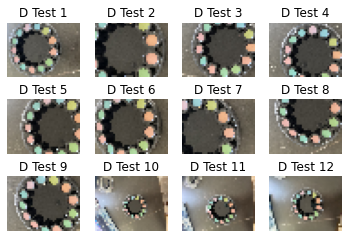

In [ ]:
from keras_preprocessing import image
n=35
images_d=[]
paths_d=[]
plt.figure(1)
plt.title("Deuteranopia Tests")
for i in range(n):
   path_d='drive/My Drive/Colorblind Tests/Positive CBT/Specific CBT/Deuteranopia/Test{}.jpeg'.format(i+1)
   image_d=image.load_img(path_d,target_size=(30,40))
   paths_d.append(path_d)
   images_d.append(image_d)
   if (i+1<=12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_d)
    plt.title("D Test {}".format(i+1))
    plt.axis('off')
results_d=[]
arrays_d=[]
for j in paths_d:
  result_d="Deuteranopia Positive"
  results_d.append(result_d)
for k in images_d:
  array_d=image.img_to_array(k)
  array_d_=array_d.flatten()
  arrays_d.append(array_d_)


In [ ]:
d=pd.DataFrame(data=images_d, columns=["Image"])
results_ddata=pd.DataFrame(data=results_d, columns=["Results"])
d_comb=pd.concat([d, results_ddata], axis=1)
d_comb

,Image,Results
0,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
1,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
2,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
3,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
4,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
5,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
6,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
7,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
8,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive
9,<PIL.Image.Image image mode=RGB size=40x30 at ...,Deuteranopia Positive


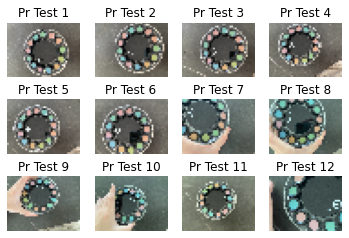

In [ ]:
from keras_preprocessing import image
n=35
images_pr=[]
paths_pr=[]
plt.figure(1)
plt.title("Protanopia Tests")
for i in range(n):
   path_pr='drive/My Drive/Colorblind Tests/Positive CBT/Specific CBT/Protanopia/Test{}.jpeg'.format(i+1)
   image_pr=image.load_img(path_pr,target_size=(30,40))
   paths_pr.append(paths_pr)
   images_pr.append(image_pr)
   if(i+1<=12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_pr)
    plt.title("Pr Test {}".format(i+1))
    plt.axis('off')
results_pr=[]
arrays_pr=[]
for j in paths_pr:
  result_pr="Protanopia Positive"
  results_pr.append(result_pr)
for k in images_pr:
  array_pr=image.img_to_array(k)
  array_pr_=array_pr.flatten()
  arrays_pr.append(array_pr_)


In [ ]:
pr=pd.DataFrame(data=images_pr, columns=["Image"])
results_pdata=pd.DataFrame(data=results_pr, columns=["Results"])
pr_comb=pd.concat([pr, results_pdata], axis=1)
pr_comb

,Image,Results
0,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
1,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
2,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
3,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
4,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
5,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
6,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
7,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
8,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive
9,<PIL.Image.Image image mode=RGB size=40x30 at ...,Protanopia Positive


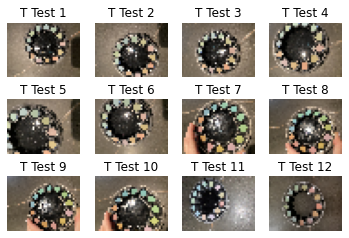

In [ ]:
from keras_preprocessing import image
n=35
images_t=[]
paths_t=[]
plt.figure(1)
plt.title("Tritanopia Tests")
for i in range(n):
   path_t='drive/My Drive/Colorblind Tests/Positive CBT/Specific CBT/Tritanopia/Test{}.jpeg'.format(i+1)
   image_t=image.load_img(path_t,target_size=(30,40))
   paths_t.append(paths_t)
   images_t.append(image_t)
   if (i+1<=12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_t)
    plt.title("T Test {}".format(i+1))
    plt.axis('off')
results_t=[]
arrays_t=[]
for j in paths_t:
  result_t="Tritanopia Positive"
  results_t.append(result_t)
for k in images_t:
  array_t=image.img_to_array(k)
  array_t_=array_t.flatten()
  arrays_t.append(array_t_)


In [ ]:
t=pd.DataFrame(data=images_t, columns=["Image"])
results_tdata=pd.DataFrame(data=results_t, columns=["Results"])
t_comb=pd.concat([t, results_tdata], axis=1)
t_comb

,Image,Results
0,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
1,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
2,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
3,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
4,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
5,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
6,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
7,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
8,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive
9,<PIL.Image.Image image mode=RGB size=40x30 at ...,Tritanopia Positive


In [ ]:
arrays_comb=np.array((arrays_d,arrays_pr,arrays_t))
arrays_modified=np.transpose(arrays_comb, axes=[0,1,2]).reshape(105,-1)
results_comb=np.array((results_d,results_pr,results_t))
results_flattened=results_comb.flatten()
results_co=pd.DataFrame(data=results_flattened, columns=["Results"])
results_co

,Results
0,Deuteranopia Positive
1,Deuteranopia Positive
2,Deuteranopia Positive
3,Deuteranopia Positive
4,Deuteranopia Positive
...,...
100,Tritanopia Positive
101,Tritanopia Positive
102,Tritanopia Positive
103,Tritanopia Positive


In [ ]:
from sklearn import preprocessing 
result2_label=preprocessing.LabelEncoder()
y2=results_co
y2_new=y2.apply(result2_label.fit_transform)
y2_new
x2=arrays_modified

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test=train_test_split(x2, y2_new, test_size=0.35)

In [ ]:
from sklearn.preprocessing import StandardScaler
data2_scaler=StandardScaler()
data2_scaler.fit(x2_train)
x2_train=data2_scaler.transform(x2_train) #scaling x data so will lead to more accurate results
x2_test=data2_scaler.transform(x2_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

obj_neural2=MLPClassifier(hidden_layer_sizes=(40,40,40), max_iter=1600) #setting up neural network. Increasing hidden layer size leads to more accurate results 
obj_neural2.fit(x2_train, y2_train.values.ravel()) #fitting neural network, including bias and weight vectors to training data 

predictions2=obj_neural.predict(x2_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y2_test, predictions2)) #compares predicted classes to actual classes --> showing which objects got classified the right way according to a matrix.
print(classification_report(y2_test, predictions2)) #analyzes the predictions 

[[ 2  9  0]
 [10  5  0]
 [ 5  6  0]]
              precision    recall  f1-score   support

           0       0.12      0.18      0.14        11
           1       0.25      0.33      0.29        15
           2       0.00      0.00      0.00        11

    accuracy                           0.19        37
   macro avg       0.12      0.17      0.14        37
weighted avg       0.14      0.19      0.16        37



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y2_u=np.array((y2_test))

In [ ]:
test_data2=pd.DataFrame(data={"Predicted Result": predictions2})
test_data2
test_data_22=pd.DataFrame(data=y2_u, columns=["Actual Result"])
test_data_33=pd.concat([test_data2, test_data_22], axis=1)
test_data_33.apply(result2_label.inverse_transform)

,Predicted Result,Actual Result
0,Protanopia Positive,Protanopia Positive
1,Protanopia Positive,Tritanopia Positive
2,Deuteranopia Positive,Protanopia Positive
3,Protanopia Positive,Deuteranopia Positive
4,Deuteranopia Positive,Tritanopia Positive
5,Deuteranopia Positive,Deuteranopia Positive
6,Protanopia Positive,Deuteranopia Positive
7,Protanopia Positive,Protanopia Positive
8,Deuteranopia Positive,Protanopia Positive
9,Deuteranopia Positive,Tritanopia Positive


In [ ]:
new_path2="drive/My Drive/Colorblind Tests/Positive CBT/Specific CBT/Deuteranopia/Test36.jpeg"
new_image2=image.load_img(new_path2, target_size=(30,40))
new_read2=image.img_to_array(new_image2)
new_readf2=new_read2.flatten()
new_read2=new_readf2.reshape(1,-1)

In [ ]:
prediction2=obj_neural.predict(new_read2)
new_result2=pd.DataFrame(prediction2, columns=["new result"])
new_result2.apply(result2_label.inverse_transform)

,new result
0,Deuteranopia Positive
